# Analysis of the network

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from scripts.get_graph import get_graph
import numpy as np
from networkx.algorithms import bipartite

## Create the network from the adjacency matrix

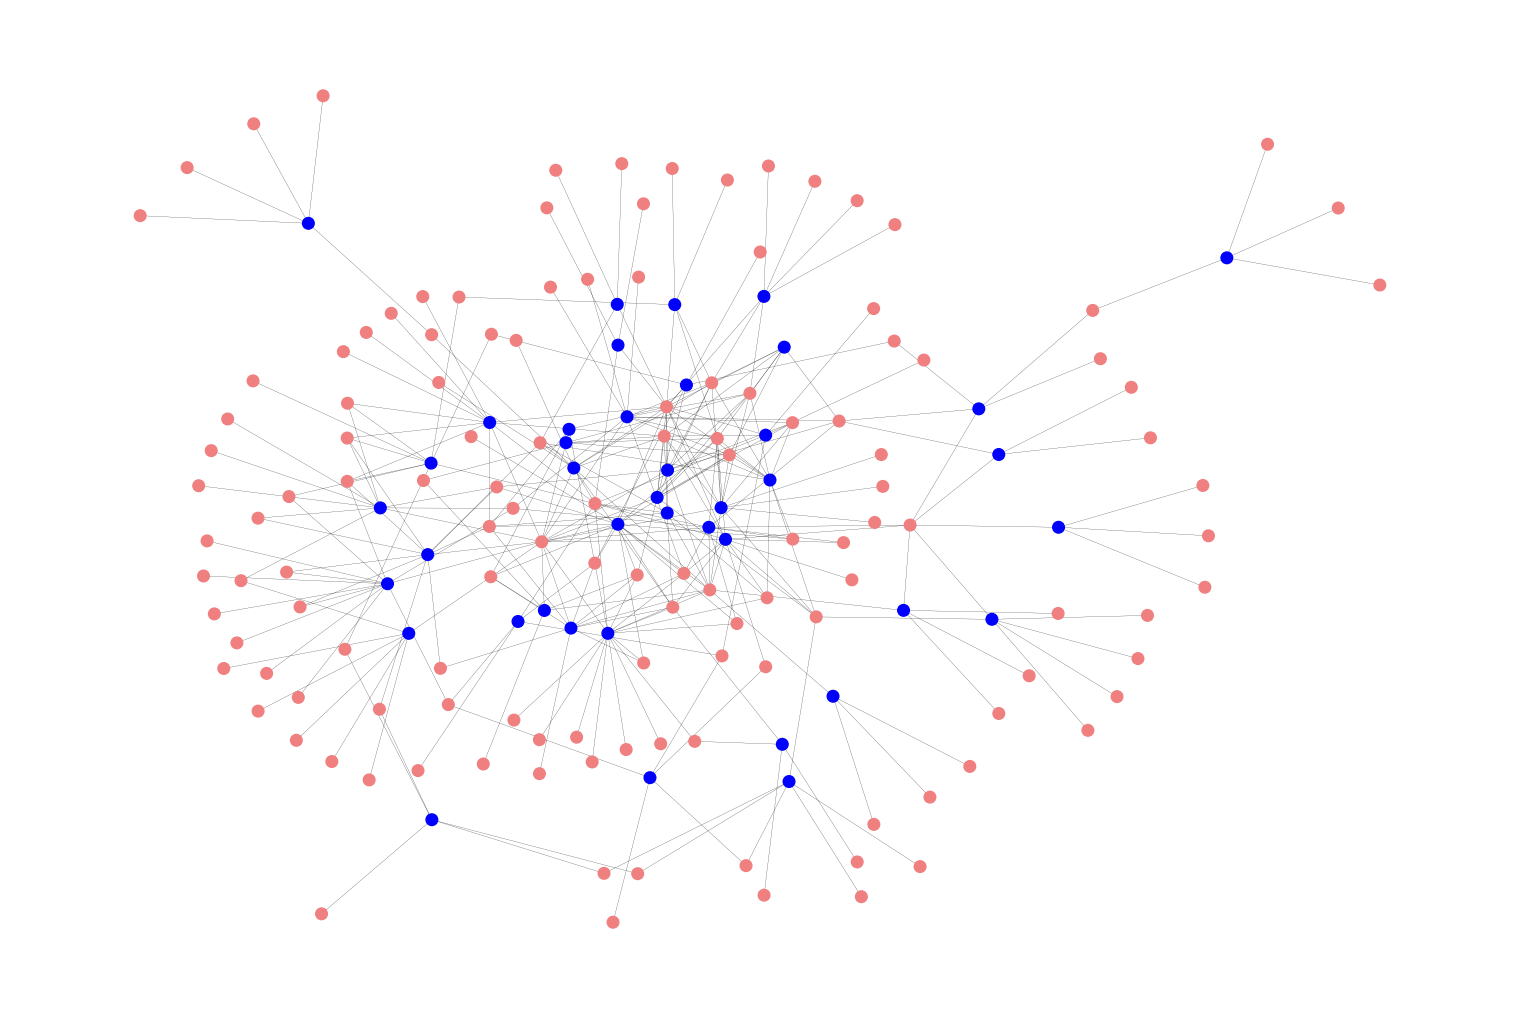

In [2]:
# Get the adjacency matrix from the data
adjacency_matrix = pd.read_csv("../dataset/adjacency_matrix.csv").values

# Remove the last column of the adjacency matrix
adjacency_matrix = adjacency_matrix[:, :-1]

num_rows, num_cols = adjacency_matrix.shape

network = get_graph(adjacency_matrix)

# Calculate Kamada-Kawai layout
pos = nx.kamada_kawai_layout(network)

# Try different layouts

# pos = nx.circular_layout(G)
# pos = nx.random_layout(G)
# pos = nx.spectral_layout(G)
# pos = nx.shell_layout(G)
# pos = nx.spring_layout(G)
# pos = nx.fruchterman_reingold_layout(G)

# Draw the bipartite graph
plt.figure(figsize=(15, 10))  # Adjust the figure size

nx.draw(
    network,
    pos,
    with_labels=False,
    font_weight="bold",
    node_size=70,  # Adjust the node size
    width=0.15,  # Adjust the edge width
    node_color=[
        "blue" if n in range(num_rows) else "lightcoral" for n in network.nodes
    ],
)
plt.show()

## Compute the Hidalgo Hausmann algorithm 

In [3]:
from scripts.hid_haus import hid_hous

# Remove the last column of the adjacency matrix
adjacency_matrix = adjacency_matrix[:, :-1]
[kd, ks] = hid_hous(adjacency_matrix, 10)

## Compute Unipartite Network

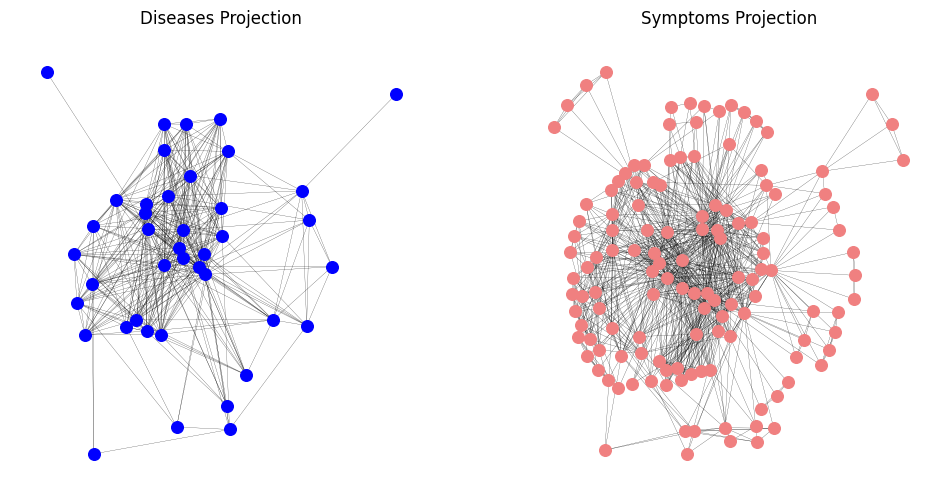

In [4]:
# Create a bipartite graph from the adjacency matrix
adjacency_matrix = pd.read_csv("../dataset/adjacency_matrix.csv").values

# Remove the last column of the adjacency matrix
adjacency_matrix = adjacency_matrix[:, :-1]

graph = get_graph(adjacency_matrix)

# Get the nodes of each partition (diseases and symptoms)
diseases = {n for n, d in graph.nodes(data=True) if d["bipartite"] == 0}
symptoms = set(graph) - diseases

# Create unipartite projections
g_diseases = nx.bipartite.projected_graph(graph, diseases)
g_symptoms = nx.bipartite.projected_graph(graph, symptoms)

# Compute the layout positions of the two unipartite projections
pos = nx.kamada_kawai_layout(graph)

# Draw the unipartite projections (optional)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Diseases Projection")
nx.draw(
    g_diseases,
    pos,
    with_labels=False,
    font_weight="bold",
    node_size=70,  # Adjust the node size
    width=0.15,  # Adjust the edge width
    node_color="blue",
)

plt.subplot(1, 2, 2)
plt.title("Symptoms Projection")
nx.draw(
    g_symptoms,
    pos,
    with_labels=False,
    font_weight="bold",
    node_size=70,  # Adjust the node size
    width=0.15,  # Adjust the edge width
    node_color="lightcoral",
)

plt.show()

## Compute Betweenness Centrality

In [5]:
print(nx.betweenness_centrality(graph))
print(nx.betweenness_centrality(g_diseases))
print(nx.betweenness_centrality(g_symptoms))

{0: 0.03437106938238824, 1: 0.0348813209494324, 2: 0.0348813209494324, 3: 0.047065794434920497, 4: 0.023848275233433677, 5: 0.019123112989114985, 6: 0.022036914241835077, 7: 0.020424241015148725, 8: 0.07996537574461474, 9: 0.012338064788723471, 10: 0.1056953581423998, 11: 0.15408834771813187, 12: 0.053973156790648784, 13: 0.046370829033367734, 14: 0.07299990490213931, 15: 0.024049997879754082, 16: 0.03400052540187364, 17: 0.023882357734059643, 18: 0.0036312882003437554, 19: 0.05877124633552194, 20: 0.010135250034898796, 21: 0.02736756729603423, 22: 0.07406952338258488, 23: 0.022267256115778344, 24: 0.0586431043483341, 25: 0.07499406701440452, 26: 0.09854801283350725, 27: 0.03942890272394795, 28: 0.034658886227382744, 29: 0.016494695132220107, 30: 0.049428128649132166, 31: 0.05208616705677099, 32: 0.024104734618544434, 33: 0.030924468089635216, 34: 0.036529335461714954, 35: 0.05126512814847302, 36: 0.06701349054250132, 37: 0.11662381249091842, 38: 0.0348813209494324, 39: 0.0619222434372

## Compute Clustering Coefficient

In [15]:
# Compute clustering coefficient
clustering_coefficient = nx.bipartite.average_clustering(graph)

print(f"Average Clustering Coefficient: {clustering_coefficient}")

# Compute clustering coefficient for symptoms
diseases_clustering = nx.bipartite.clustering(
    graph, nodes=range(adjacency_matrix.shape[0])
)

# Compute clustering coefficient for diseases
symptoms_clustering = nx.bipartite.clustering(
    graph,
    nodes=range(
        adjacency_matrix.shape[0], adjacency_matrix.shape[1] + adjacency_matrix.shape[0]
    ),
)

graph.nodes.data()

Average Clustering Coefficient: 0.34025818113833406


NodeDataView({0: {'bipartite': 0}, 1: {'bipartite': 0}, 2: {'bipartite': 0}, 3: {'bipartite': 0}, 4: {'bipartite': 0}, 5: {'bipartite': 0}, 6: {'bipartite': 0}, 7: {'bipartite': 0}, 8: {'bipartite': 0}, 9: {'bipartite': 0}, 10: {'bipartite': 0}, 11: {'bipartite': 0}, 12: {'bipartite': 0}, 13: {'bipartite': 0}, 14: {'bipartite': 0}, 15: {'bipartite': 0}, 16: {'bipartite': 0}, 17: {'bipartite': 0}, 18: {'bipartite': 0}, 19: {'bipartite': 0}, 20: {'bipartite': 0}, 21: {'bipartite': 0}, 22: {'bipartite': 0}, 23: {'bipartite': 0}, 24: {'bipartite': 0}, 25: {'bipartite': 0}, 26: {'bipartite': 0}, 27: {'bipartite': 0}, 28: {'bipartite': 0}, 29: {'bipartite': 0}, 30: {'bipartite': 0}, 31: {'bipartite': 0}, 32: {'bipartite': 0}, 33: {'bipartite': 0}, 34: {'bipartite': 0}, 35: {'bipartite': 0}, 36: {'bipartite': 0}, 37: {'bipartite': 0}, 38: {'bipartite': 0}, 39: {'bipartite': 0}, 40: {'bipartite': 0}, 41: {'bipartite': 1}, 42: {'bipartite': 1}, 43: {'bipartite': 1}, 44: {'bipartite': 1}, 45: {'